<a href="https://colab.research.google.com/github/KRiver28/TIL/blob/master/BikeSharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [522]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Input, Dense, Dropout, Embedding
from tensorflow.keras.layers import Flatten, Dot, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder


In [523]:
train = pd.read_csv("/content/train.csv", parse_dates=["datetime"])
test = pd.read_csv("/content/test.csv", parse_dates=["datetime"])
train.shape

(10886, 12)

In [524]:
#datetime 쪼개기 - train
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [525]:
train=train.drop(['datetime','atemp','year','registered','casual'],axis=1)

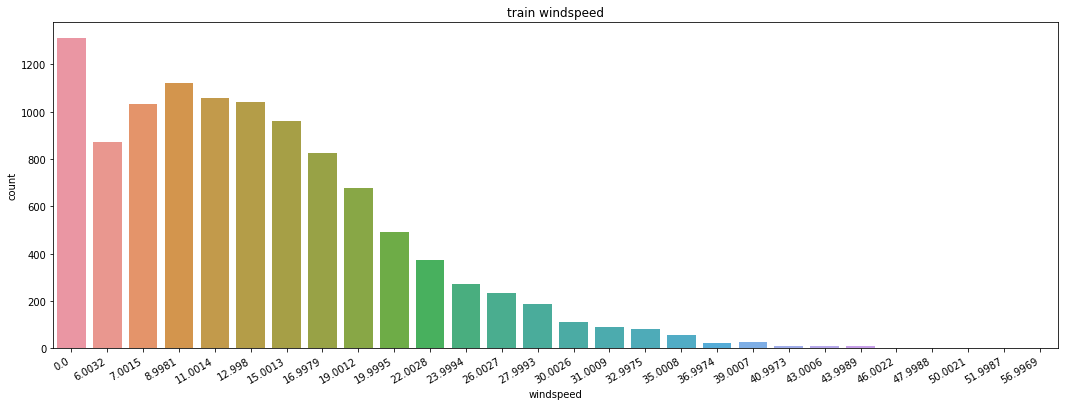

In [526]:
fig, axes = plt.subplots()
fig.set_size_inches(18,6)

plt.sca(axes)
plt.xticks(rotation=30, ha='right')
axes.set(ylabel='Count',title="train windspeed")
sns.countplot(data=train, x="windspeed", ax=axes)

#표준화

In [527]:
#풍속의 0값에 평균 값을 넣어준다
train.loc[train["windspeed"] == 0, "windspeed"] = train["windspeed"].mean()

In [528]:
train['season'] /= 4.0   #표준화.
train['temp']  /= 41.0 #최대값 41
train['humidity']  /= 100.0
train['windspeed'] /= 57   #최대값 = 56.9969
train['weather'] /= 4.0   
train['holiday'] /= 2.0   
train['hour']  /= 24.0  
train['humidity']  /= 100.0
train.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,count,month,day,hour
0,0.25,0.0,0,0.25,0.24,0.0081,0.224551,16,1,1,0.000000
1,0.25,0.0,0,0.25,0.22,0.0080,0.224551,40,1,1,0.041667
2,0.25,0.0,0,0.25,0.22,0.0080,0.224551,32,1,1,0.083333
3,0.25,0.0,0,0.25,0.24,0.0075,0.224551,13,1,1,0.125000
4,0.25,0.0,0,0.25,0.24,0.0075,0.224551,1,1,1,0.166667


#학습

In [529]:
x_feat = train
x_feat = pd.get_dummies(x_feat, columns=['month','hour', 'holiday', 'workingday','season','weather'])
y_target = np.array(train['count']).reshape(-1,1)


In [530]:
# 학습 데이터와 시험 데이터를 생성한다.
x_train, x_test, y_train, y_test = train_test_split(x_feat, y_target, test_size=0.2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8708, 53), (2178, 53), (8708, 1), (2178, 1))

In [531]:
#입력층
xInput = Input(batch_shape = (None, x_train.shape[1]))

#은닉층
hLayer = Dense(10, activation = 'relu')(xInput)

#출력층
yOutput = Dense(y_train.shape[1])(hLayer)

In [532]:
model = Model(xInput, yOutput)
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [533]:
#학습
hist = model.fit(x_train, y_train, batch_size = 50, epochs = 300,
          validation_data = (x_test, y_test))

Epoch 1/300
175/175 [==============================] - 1s 3ms/step - loss: 36969.9844 - val_loss: 24540.6582
Epoch 2/300
175/175 [==============================] - 0s 2ms/step - loss: 17139.8984 - val_loss: 8916.6201
Epoch 3/300
175/175 [==============================] - 0s 2ms/step - loss: 5026.6689 - val_loss: 1787.1019
Epoch 4/300
175/175 [==============================] - 0s 2ms/step - loss: 796.1151 - val_loss: 191.4150
Epoch 5/300
175/175 [==============================] - 0s 2ms/step - loss: 78.5469 - val_loss: 18.0921
Epoch 6/300
175/175 [==============================] - 0s 2ms/step - loss: 8.8603 - val_loss: 2.7345
Epoch 7/300
175/175 [==============================] - 0s 2ms/step - loss: 1.8187 - val_loss: 0.7159
Epoch 8/300
175/175 [==============================] - 0s 2ms/step - loss: 0.6187 - val_loss: 0.2603
Epoch 9/300
175/175 [==============================] - 0s 2ms/step - loss: 0.2802 - val_loss: 0.1197
Epoch 10/300
175/175 [==============================] - 0s 2ms/s

<function matplotlib.pyplot.show>

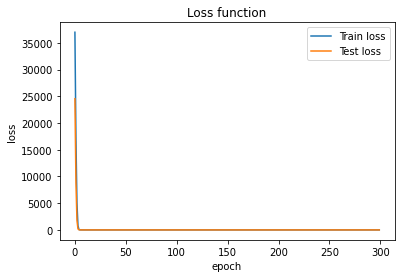

In [534]:
#error 관찰
plt.plot(hist.history['loss'], label = 'Train loss')
plt.plot(hist.history['val_loss'], label = 'Test loss')
plt.legend()
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show

In [535]:
# 학습이 완료되면 x_test를 넣어서 출력값을 확인한다.
y_pred = model.predict(x_test)

# y_test와 y_pred로 R2 score를 계산한다.
r2 = r2_score(y_test, y_pred)
print('시험 데이터의 R-score = {:.3f}'.format(r2))
print(r2)

시험 데이터의 R-score = 1.000
0.9999999999985373
